In [ ]:
import keras
keras.__version__

'3.8.0'

In [ ]:
from getpass import getpass
import os
user = ''
key = ''

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 89% 698M/788M [00:04<00:02, 41.8MB/s]
100% 788M/788M [00:04<00:00, 199MB/s] 


In [ ]:
!ls

microsoft-catsvsdogs-dataset.zip  sample_data


In [ ]:
!chmod 777 *

In [ ]:
!unzip microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [ ]:
!ls

 microsoft-catsvsdogs-dataset.zip   PetImages	     sample_data
'MSR-LA - 3467.docx'		   'readme[1].txt'


In [ ]:
!ls PetImages

Cat  Dog


In [ ]:
!ls PetImages/Cat/0.jpg

PetImages/Cat/0.jpg


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
import cv2

img = cv2.imread('PetImages/Cat/0.jpg')


array([[[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [122, 201, 240],
        [121, 200, 239],
        [120, 199, 238]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [122, 201, 240],
        [121, 200, 239],
        [121, 200, 239]],

       [[ 87, 164, 203],
        [ 87, 164, 203],
        [ 88, 165, 204],
        ...,
        [123, 202, 241],
        [122, 201, 240],
        [121, 200, 239]],

       ...,

       [[ 55, 122, 153],
        [ 55, 122, 153],
        [ 55, 122, 153],
        ...,
        [  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[ 54, 121, 152],
        [ 54, 121, 152],
        [ 54, 121, 152],
        ...,
        [  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1]],

       [[ 53, 120, 151],
        [ 53, 120, 151],
        [ 54, 121, 152],
        ...,
        [  0,   1,   1],
        [  0,   1,   1],
        [  0,   1,   1]]], dtype=uint8)
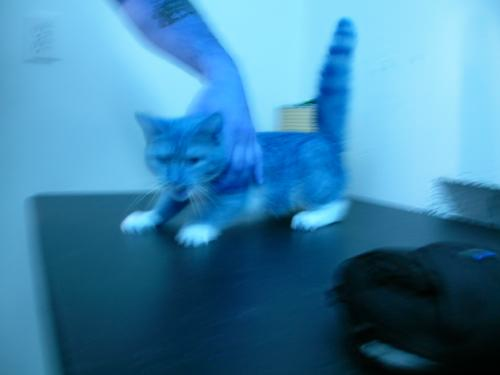

In [ ]:
img

In [ ]:
!ls PetImages/Cat | wc -l


12501


In [ ]:
!pwd

/content


In [ ]:
import os, shutil

original_cats_dir = 'PetImages/Cat'
original_dogs_dir = 'PetImages/Dog'

base_dir = 'cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

dirs = {
    'train_cats': os.path.join(train_dir, 'cats'),
    'train_dogs': os.path.join(train_dir, 'dogs'),
    'val_cats': os.path.join(val_dir, 'cats'),
    'val_dogs': os.path.join(val_dir, 'dogs'),
    'test_cats': os.path.join(test_dir, 'cats'),
    'test_dogs': os.path.join(test_dir, 'dogs')
}

for d in dirs.values():
    os.makedirs(d, exist_ok=True)


In [ ]:
from PIL import Image

def get_valid_images(folder, limit=2000):
    images = []
    for fname in sorted(os.listdir(folder)):
        fpath = os.path.join(folder, fname)
        try:
            with Image.open(fpath) as img:
                img.verify()
            images.append(fname)
            if len(images) >= limit:
                break
        except:
            continue
    return images

cat_files = get_valid_images(original_cats_dir)
dog_files = get_valid_images(original_dogs_dir)


In [ ]:
for i, fname in enumerate(cat_files[:1000]):
    shutil.copy(os.path.join(original_cats_dir, fname), os.path.join(dirs['train_cats'], f'cat_{i}.jpg'))

for i, fname in enumerate(cat_files[1000:1500]):
    shutil.copy(os.path.join(original_cats_dir, fname), os.path.join(dirs['val_cats'], f'cat_{i}.jpg'))

for i, fname in enumerate(cat_files[1500:2000]):
    shutil.copy(os.path.join(original_cats_dir, fname), os.path.join(dirs['test_cats'], f'cat_{i}.jpg'))

for i, fname in enumerate(dog_files[:1000]):
    shutil.copy(os.path.join(original_dogs_dir, fname), os.path.join(dirs['train_dogs'], f'dog_{i}.jpg'))

for i, fname in enumerate(dog_files[1000:1500]):
    shutil.copy(os.path.join(original_dogs_dir, fname), os.path.join(dirs['val_dogs'], f'dog_{i}.jpg'))

for i, fname in enumerate(dog_files[1500:2000]):
    shutil.copy(os.path.join(original_dogs_dir, fname), os.path.join(dirs['test_dogs'], f'dog_{i}.jpg'))


In [ ]:
!ls


 cats_and_dogs_small		   'MSR-LA - 3467.docx'  'readme[1].txt'
 microsoft-catsvsdogs-dataset.zip   PetImages		  sample_data


In [ ]:
print("🔹 Train Cats:")
print(os.listdir('cats_and_dogs_small/train/cats')[:5])

print("\n🔹 Train Dogs:")
print(os.listdir('cats_and_dogs_small/train/dogs')[:5])

print("\n🔹 Validation Cats:")
print(os.listdir('cats_and_dogs_small/validation/cats')[:5])

print("\n🔹 Test Dogs:")
print(os.listdir('cats_and_dogs_small/test/dogs')[:5])

🔹 Train Cats:
['cat_83.jpg', 'cat_476.jpg', 'cat_900.jpg', 'cat_866.jpg', 'cat_863.jpg']

🔹 Train Dogs:
['dog_183.jpg', 'dog_513.jpg', 'dog_205.jpg', 'dog_503.jpg', 'dog_774.jpg']

🔹 Validation Cats:
['cat_83.jpg', 'cat_476.jpg', 'cat_167.jpg', 'cat_365.jpg', 'cat_412.jpg']

🔹 Test Dogs:
['dog_183.jpg', 'dog_205.jpg', 'dog_483.jpg', 'dog_434.jpg', 'dog_283.jpg']


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - acc: 0.5146 - loss: 0.6970

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - acc: 0.5147 - loss: 0.6970 - val_acc: 0.5290 - val_loss: 0.6850
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - acc: 0.5833 - loss: 0.6700 - val_acc: 0.6130 - val_loss: 0.6519
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - acc: 0.6103 - loss: 0.6547 - val_acc: 0.6310 - val_loss: 0.6253
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - acc: 0.6452 - loss: 0.6172 - val_acc: 0.6730 - val_loss: 0.6097
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - acc: 0.6693 - loss: 0.5965 - val_acc: 0.6800 - val_loss: 0.5867
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - acc: 0.7098 - loss: 0.5660 - val_acc: 0.6800 - val_loss: 0.5782
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - acc: 0.7138 - loss: 0.5396 - val_acc: 0.6980 - val_loss: 0.5634
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - acc: 0.7175 - loss: 0.5418 - val_acc: 0.7040 - val_loss: 0.5537
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - acc:

In [ ]:
print(train_generator.class_indices)


{'cats': 0, 'dogs': 1}


In [ ]:
model.save('gdrive/My Drive/cats_and_dogs_small_2.keras')

In [ ]:
from keras.models import load_model

model2 = load_model('gdrive/My Drive/cats_and_dogs_small_2.keras')
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,906,244 (26.35 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,453,123 (13.17 MB)

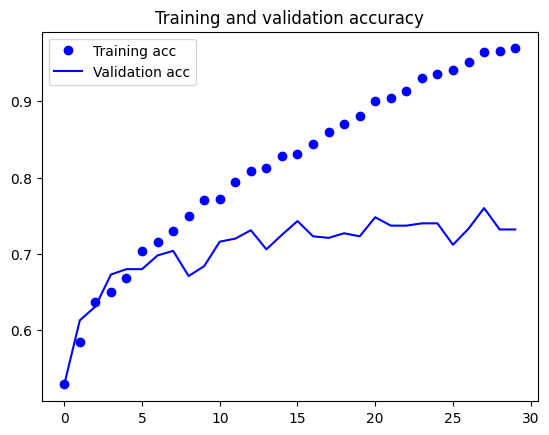

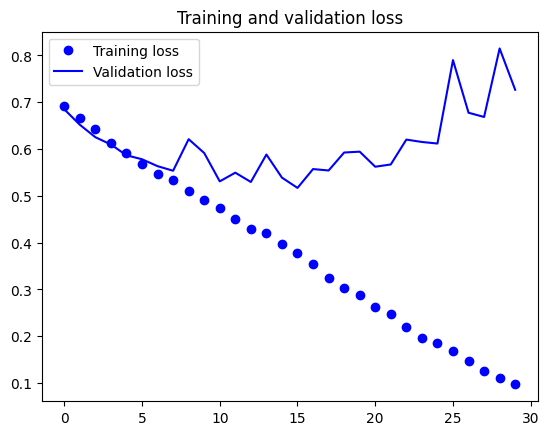

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)



Found 1000 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_generator)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step


In [ ]:
predicted_classes = (predictions > 0.5).astype("int32")


In [ ]:
filenames = test_generator.filenames

for fname, pred in zip(filenames, predicted_classes):
    label = 'dog' if pred == 1 else 'cat'
    print(f"{fname}: {label}")


cats/cat_0.jpg: cat
cats/cat_1.jpg: dog
cats/cat_10.jpg: cat
cats/cat_100.jpg: cat
cats/cat_101.jpg: cat
cats/cat_102.jpg: cat
cats/cat_103.jpg: cat
cats/cat_104.jpg: cat
cats/cat_105.jpg: cat
cats/cat_106.jpg: cat
cats/cat_107.jpg: cat
cats/cat_108.jpg: cat
cats/cat_109.jpg: dog
cats/cat_11.jpg: cat
cats/cat_110.jpg: cat
cats/cat_111.jpg: cat
cats/cat_112.jpg: cat
cats/cat_113.jpg: cat
cats/cat_114.jpg: cat
cats/cat_115.jpg: cat
cats/cat_116.jpg: dog
cats/cat_117.jpg: cat
cats/cat_118.jpg: cat
cats/cat_119.jpg: dog
cats/cat_12.jpg: cat
cats/cat_120.jpg: cat
cats/cat_121.jpg: cat
cats/cat_122.jpg: dog
cats/cat_123.jpg: cat
cats/cat_124.jpg: cat
cats/cat_125.jpg: dog
cats/cat_126.jpg: dog
cats/cat_127.jpg: cat
cats/cat_128.jpg: dog
cats/cat_129.jpg: cat
cats/cat_13.jpg: cat
cats/cat_130.jpg: cat
cats/cat_131.jpg: cat
cats/cat_132.jpg: cat
cats/cat_133.jpg: cat
cats/cat_134.jpg: cat
cats/cat_135.jpg: cat
cats/cat_136.jpg: cat
cats/cat_137.jpg: dog
cats/cat_138.jpg: cat
cats/cat_139.jpg: 